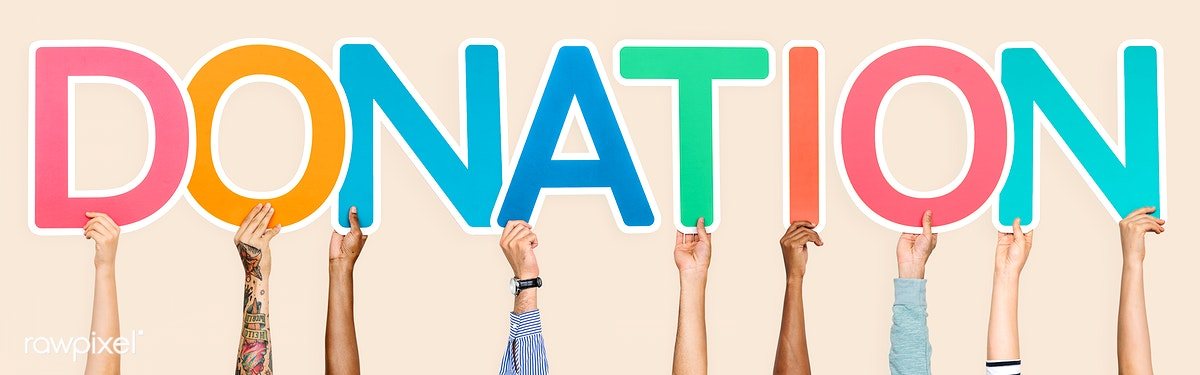

# Business Problem

### Q1: Which 10 states have the most number of schools that opened projects to gather donations ?
### Q2: What are the top 10 states in which schools gathered most amount of AVERAGE donations for their projects ?
### Q3: How mant different project types exists ? What is the total donation amount for each of them ?
### Q4: How mant project subject category trees exists ? Which ones attracted the most donations ?
### Q5: What is the mean time that takes a project to be fully funded after posted and how it varies between states ?
### Q6: Which states are the best and which are the worst performing in terms of this criteria ( mean project fully funded time) ?

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# Necessary libraries for plotting.
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from matplotlib import style 
import datetime as dt
style.use("ggplot")

# Data Reading 

In [3]:
resources = pd.read_csv("Resources.csv", error_bad_lines = False, warn_bad_lines = False, low_memory = False)

C:\Users\shubh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\shubh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
schools = pd.read_csv("Schools.csv", error_bad_lines = False, warn_bad_lines = False)

In [5]:
donors = pd.read_csv("Donors.csv",low_memory = False)

In [6]:
donations = pd.read_csv("Donations.csv", error_bad_lines = False, warn_bad_lines = False)

In [7]:
teachers = pd.read_csv("Teachers.csv", error_bad_lines = False, warn_bad_lines = False)

In [8]:
projects = pd.read_csv("Projects.csv", error_bad_lines = False, warn_bad_lines = False)

In [9]:
## lets look at their shapes respectively.
print(" Shape of the resources dataframe is: " , resources.shape)
print(" Shape of the schools dataframe is: ", schools.shape)
print(" Shape of the donors dataframe is: ", donors.shape)
print(" Shape of the donations dataframe is: ", donations.shape)
print(" Shape of the teachers dataframe is: ", teachers.shape)
print(" Shape of the projects dataframe is: ", projects.shape)

 Shape of the resources dataframe is:  (7210448, 5)
 Shape of the schools dataframe is:  (72993, 9)
 Shape of the donors dataframe is:  (2122640, 5)
 Shape of the donations dataframe is:  (4687884, 7)
 Shape of the teachers dataframe is:  (402900, 3)
 Shape of the projects dataframe is:  (1110017, 18)


In [10]:
resources.head()

,Project ID,Resource Item Name,Resource Quantity,Resource Unit Price,Resource Vendor Name
0,000009891526c0ade7180f8423792063,chair move and store cart,1.0,350.00,NaN
1,00000ce845c00cbf0686c992fc369df4,sony mdr zx100 blk headphones,40.0,12.86,CDW-G
2,00002d44003ed46b066607c5455a999a,"gaiam kids stay-n-play balance ball, grey",4.0,19.00,Amazon Business
3,00002d44003ed46b066607c5455a999a,cf520x - giant comfy pillows - set of 4,1.0,269.00,Lakeshore Learning Materials
4,00002d44003ed46b066607c5455a999a,"serta lounger, mini, sky blue",1.0,131.85,Amazon Business


In [11]:
schools.head()

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56.0,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District
1,00004e32a448b4832e1b993500bf0731,The Woodlands College Park High School,urban,41.0,Texas,77384,The Woodlands,Montgomery,Conroe Ind School District
2,0002021bb799f28de224f1acc1ff08c4,Samantha Smith Elementary School,suburban,2.0,Washington,98074,Sammamish,King,Lake Washington Sch Dist 414
3,0004604f675212a8cac1161338265196,Kingsbury Country Day School,unknown,76.0,Michigan,48370,Oxford,Oakland,Michigan Dept Of Education
4,0004c9d50bcf0cea990f844e58b5e2c3,Redwater Elementary School,rural,50.0,Texas,75573,Redwater,Bowie,Redwater Ind Sch District


In [12]:
donors.head()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


In [13]:
donations.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38


In [14]:
teachers.head()

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
0,00000f7264c27ba6fea0c837ed6aa0aa,Mrs.,2013-08-21
1,00002d44003ed46b066607c5455a999a,Mrs.,2016-10-23
2,00006084c3d92d904a22e0a70f5c119a,Mr.,2016-09-08
3,0000a9af8b6b9cc9e41f53322a8b8cf1,Ms.,2015-10-25
4,0000d4777d14b33a1406dd6c9019fe89,Ms.,2017-02-10


In [15]:
projects.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01


## Data Exploration 

In [16]:
## To get the column names of our dataframes

In [17]:
schools.columns

Index(['School ID', 'School Name', 'School Metro Type',
       'School Percentage Free Lunch', 'School State', 'School Zip',
       'School City', 'School County', 'School District'],
      dtype='object')

In [18]:
projects.columns

Index(['Project ID', 'School ID', 'Teacher ID',
       'Teacher Project Posted Sequence', 'Project Type', 'Project Title',
       'Project Essay', 'Project Short Description', 'Project Need Statement',
       'Project Subject Category Tree', 'Project Subject Subcategory Tree',
       'Project Grade Level Category', 'Project Resource Category',
       'Project Cost', 'Project Posted Date', 'Project Expiration Date',
       'Project Current Status', 'Project Fully Funded Date'],
      dtype='object')

In [19]:
resources.columns

Index(['Project ID', 'Resource Item Name', 'Resource Quantity',
       'Resource Unit Price', 'Resource Vendor Name'],
      dtype='object')

In [20]:
donors.columns

Index(['Donor ID', 'Donor City', 'Donor State', 'Donor Is Teacher',
       'Donor Zip'],
      dtype='object')

In [21]:
donations.columns

Index(['Project ID', 'Donation ID', 'Donor ID',
       'Donation Included Optional Donation', 'Donation Amount',
       'Donor Cart Sequence', 'Donation Received Date'],
      dtype='object')

In [22]:
teachers.columns

Index(['Teacher ID', 'Teacher Prefix', 'Teacher First Project Posted Date'], dtype='object')

In [23]:
#To get the data type of each column of a dataframe:


In [24]:
donations.dtypes

Project ID                              object
Donation ID                             object
Donor ID                                object
Donation Included Optional Donation     object
Donation Amount                        float64
Donor Cart Sequence                      int64
Donation Received Date                  object
dtype: object

In [25]:
schools.dtypes

School ID                        object
School Name                      object
School Metro Type                object
School Percentage Free Lunch    float64
School State                     object
School Zip                        int64
School City                      object
School County                    object
School District                  object
dtype: object

In [26]:
projects.dtypes

Project ID                           object
School ID                            object
Teacher ID                           object
Teacher Project Posted Sequence       int64
Project Type                         object
Project Title                        object
Project Essay                        object
Project Short Description            object
Project Need Statement               object
Project Subject Category Tree        object
Project Subject Subcategory Tree     object
Project Grade Level Category         object
Project Resource Category            object
Project Cost                        float64
Project Posted Date                  object
Project Expiration Date              object
Project Current Status               object
Project Fully Funded Date            object
dtype: object

In [27]:
resources.dtypes

Project ID               object
Resource Item Name       object
Resource Quantity       float64
Resource Unit Price     float64
Resource Vendor Name     object
dtype: object

In [28]:
donors.dtypes

Donor ID            object
Donor City          object
Donor State         object
Donor Is Teacher    object
Donor Zip           object
dtype: object

In [29]:
teachers.dtypes

Teacher ID                           object
Teacher Prefix                       object
Teacher First Project Posted Date    object
dtype: object

In [30]:
#To get the number of Nan's in each column of a dataframe

In [31]:
donations.isnull().sum()

Project ID                             0
Donation ID                            0
Donor ID                               0
Donation Included Optional Donation    0
Donation Amount                        0
Donor Cart Sequence                    0
Donation Received Date                 0
dtype: int64

In [32]:
schools.isnull().sum()

School ID                          0
School Name                        0
School Metro Type                  0
School Percentage Free Lunch    1141
School State                       0
School Zip                         0
School City                      227
School County                      2
School District                    0
dtype: int64

In [33]:
projects.isnull().sum()

Project ID                               0
School ID                                0
Teacher ID                               0
Teacher Project Posted Sequence          0
Project Type                             0
Project Title                            6
Project Essay                            1
Project Short Description                3
Project Need Statement                   3
Project Subject Category Tree           29
Project Subject Subcategory Tree        29
Project Grade Level Category             0
Project Resource Category               36
Project Cost                             0
Project Posted Date                      0
Project Expiration Date                 14
Project Current Status                   0
Project Fully Funded Date           283253
dtype: int64

In [34]:
resources.isnull().sum()

Project ID                  0
Resource Item Name        561
Resource Quantity       24299
Resource Unit Price     24310
Resource Vendor Name    81994
dtype: int64

In [35]:
donors.isnull().sum()

Donor ID                 0
Donor City          213097
Donor State              0
Donor Is Teacher         0
Donor Zip           180060
dtype: int64

In [36]:
teachers.isnull().sum()

Teacher ID                            0
Teacher Prefix                       28
Teacher First Project Posted Date     0
dtype: int64

In [37]:
#To understands the statistics of columns that have numeric data types

In [38]:
donations.describe()

,Donation Amount,Donor Cart Sequence
count,4.687884e+06,4.687884e+06
mean,6.066879e+01,1.430545e+02
std,1.668996e+02,8.723086e+02
min,1.000000e-02,1.000000e+00
25%,1.482000e+01,1.000000e+00
50%,2.500000e+01,2.000000e+00
75%,5.000000e+01,1.200000e+01
max,6.000000e+04,1.811600e+04


In [39]:
schools.describe()

,School Percentage Free Lunch,School Zip
count,71852.000000,72993.000000
mean,58.556115,53382.093406
std,25.508378,29131.096568
min,0.000000,705.000000
25%,40.000000,29554.000000
50%,61.000000,53095.000000
75%,80.000000,78572.000000
max,100.000000,99950.000000


In [40]:
projects.describe()

,Teacher Project Posted Sequence,Project Cost
count,1.110017e+06,1.110017e+06
mean,1.124050e+01,7.415240e+02
std,2.595475e+01,1.083256e+03
min,1.000000e+00,3.529000e+01
25%,1.000000e+00,3.351200e+02
50%,3.000000e+00,5.153500e+02
75%,9.000000e+00,8.675200e+02
max,4.970000e+02,2.557377e+05


In [41]:
resources.describe()

,Resource Quantity,Resource Unit Price
count,7.186149e+06,7.186138e+06
mean,2.816518e+00,5.341337e+01
std,8.866547e+00,1.863248e+02
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,7.260000e+00
50%,1.000000e+00,1.439000e+01
75%,2.000000e+00,3.640000e+01
max,4.125000e+03,9.708550e+04


In [42]:
donors.describe()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
count,2122640,1909543,2122640,2122640,1942580
unique,2122640,15204,52,2,1065
top,00000ce845c00cbf0686c992fc369df4,Chicago,California,No,606
freq,1,34352,294695,1910355,35047


In [43]:
teachers.describe()

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
count,402900,402872,402900
unique,402900,6,4699
top,00000f7264c27ba6fea0c837ed6aa0aa,Mrs.,2015-09-13
freq,1,202142,2067


In [44]:
## To understand how many unique values that a column have

In [46]:
schools["School Name"].nunique()

56831

In [48]:
donors["Donor City"].nunique()

15204

In [49]:
teachers["Teacher Prefix"].nunique()

6

In [50]:
# Need to change the data type as the "School Percentage Free Lunch" column of schools dataframe given as string but it must be float type as expected

In [51]:
schools["School Percentage Free Lunch"] = schools["School Percentage Free Lunch"].astype(float)

## Combining all dataframe in one dataframe

In [52]:
data = pd.merge(projects, donations, how = "inner", on = "Project ID")

In [53]:
data.shape

(4614113, 24)

In [54]:
data2 = pd.merge(data, donors, how = "inner", on = "Donor ID")

In [55]:
data2.shape

(4608140, 28)

In [56]:
data3 = pd.merge(data2, schools, how = "inner", on = "School ID")

In [57]:
data3.shape

(4608110, 36)

In [58]:
data4 = pd.merge(data3, teachers, how = "inner", on = "Teacher ID")

In [59]:
data4.shape

(4608080, 38)

In [60]:
data4.head(5)

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,...,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District,Teacher Prefix,Teacher First Project Posted Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,...,Stanford Primary Center,suburban,95.0,California,90280,South Gate,Los Angeles,Los Angeles Unif Sch Dist,Mrs.,2011-12-11
1,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,...,Stanford Primary Center,suburban,95.0,California,90280,South Gate,Los Angeles,Los Angeles Unif Sch Dist,Mrs.,2011-12-11
2,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,...,Stanford Primary Center,suburban,95.0,California,90280,South Gate,Los Angeles,Los Angeles Unif Sch Dist,Mrs.,2011-12-11
3,e11cc13f5f29c1a92c1a396a8c7471fb,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,26,Teacher-Led,Recipe For Happiness: Children Need Support!,Did you know that bullying takes many forms? I...,Did you know that bullying takes many forms? I...,"My students need the book, ""Bullying in School...","Applied Learning, Health & Sports",...,Stanford Primary Center,suburban,95.0,California,90280,South Gate,Los Angeles,Los Angeles Unif Sch Dist,Mrs.,2011-12-11
4,e11cc13f5f29c1a92c1a396a8c7471fb,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,26,Teacher-Led,Recipe For Happiness: Children Need Support!,Did you know that bullying takes many forms? I...,Did you know that bullying takes many forms? I...,"My students need the book, ""Bullying in School...","Applied Learning, Health & Sports",...,Stanford Primary Center,suburban,95.0,California,90280,South Gate,Los Angeles,Los Angeles Unif Sch Dist,Mrs.,2011-12-11


In [61]:
a = data4.columns.values.tolist()  ##to get all column names in our dataframe as a list.

In [62]:
a

['Project ID',
 'School ID',
 'Teacher ID',
 'Teacher Project Posted Sequence',
 'Project Type',
 'Project Title',
 'Project Essay',
 'Project Short Description',
 'Project Need Statement',
 'Project Subject Category Tree',
 'Project Subject Subcategory Tree',
 'Project Grade Level Category',
 'Project Resource Category',
 'Project Cost',
 'Project Posted Date',
 'Project Expiration Date',
 'Project Current Status',
 'Project Fully Funded Date',
 'Donation ID',
 'Donor ID',
 'Donation Included Optional Donation',
 'Donation Amount',
 'Donor Cart Sequence',
 'Donation Received Date',
 'Donor City',
 'Donor State',
 'Donor Is Teacher',
 'Donor Zip',
 'School Name',
 'School Metro Type',
 'School Percentage Free Lunch',
 'School State',
 'School Zip',
 'School City',
 'School County',
 'School District',
 'Teacher Prefix',
 'Teacher First Project Posted Date']

### Q1: Which 10 states have the most number of schools that opened projects to gather donations ? 

In [63]:
s = schools["School State"].value_counts().sort_values(ascending = False).head(10)

In [64]:
s


California        8457
Texas             6485
New York          3819
Florida           3302
Illinois          3126
Michigan          2653
Ohio              2546
North Carolina    2543
Pennsylvania      2163
Georgia           2125
Name: School State, dtype: int64

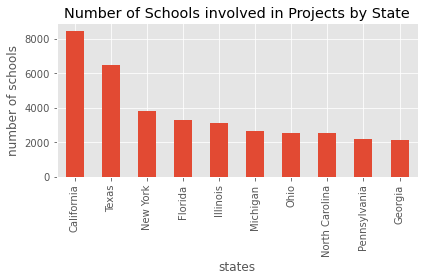

In [65]:
# lets visualize this with a bar plot Since it has different categories ( states )
s.plot.bar()
plt.xlabel("states")
plt.ylabel("number of schools")
plt.title("Number of Schools involved in Projects by State")
plt.tight_layout()
plt.margins(0.05)

### Q2: What are the top 10 states in which schools gathered most amount of AVERAGE donations for their projects ?

In [66]:
s2 = data4.groupby("School State")["Donation Amount"].mean().sort_values(ascending = False).head(10)

In [67]:
s2

School State
Wyoming                 130.232248
Hawaii                   95.364167
Massachusetts            77.926463
Rhode Island             72.429974
District of Columbia     70.693202
North Dakota             69.777091
Washington               69.161616
New Jersey               68.586876
Montana                  67.186760
Alaska                   66.990084
Name: Donation Amount, dtype: float64

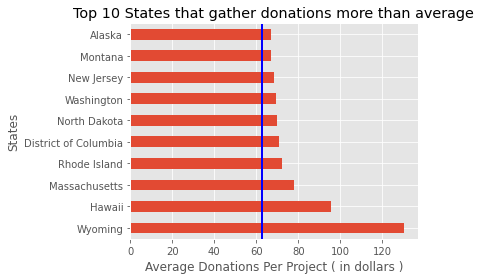

In [68]:
# Lets visualize states that have more average donations per project than others.
s2.plot.barh()
plt.xlabel("Average Donations Per Project ( in dollars )")
plt.ylabel("States")
plt.axvline(data4.groupby("School State")["Donation Amount"].mean().mean(), color = "blue", linewidth = 2 )
plt.title("Top 10 States that gather donations more than average")
plt.tight_layout()
plt.margins(0.05)

In [69]:
# I want to further investigate the maximum, minimum, mean, median, 25th and 75th percentiles of "Donation Amount" column. What is the average donation
# amount acroos all projects ? What are the minimum and maximums ? 
mean = np.mean(data4["Donation Amount"].dropna())
median = np.median(data4["Donation Amount"].dropna())
percentiles = np.percentile(data4["Donation Amount"].dropna(), [25,75])
minimum = data4["Donation Amount"].dropna().min()
maximum = data4["Donation Amount"].dropna().max()
print("Mean donation amount is: ", np.round(mean,2))
print("Median donation amount is ", median)
print("25th and 75th percentiles are: ", percentiles)
print("Minimum and maximum donation amounts are :", minimum, "    ",maximum)

Mean donation amount is:  61.03
Median donation amount is  25.0
25th and 75th percentiles are:  [15. 50.]
Minimum and maximum donation amounts are : 0.01      60000.0


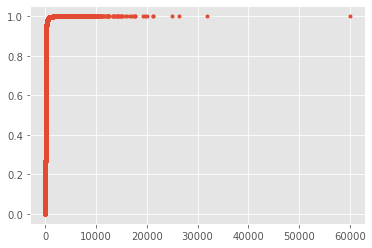

In [70]:
# I want to plot Empirical Cumulative Distribution Function(ECDF) of "Donation Amount" column.It will better visualize the existence of outliers 
# in the data.This method is pretty nifty for EDA. I recommend you to adapt this as a convention.
# Basically it shows in which percent my data has points greater or smaller than the value shown in the x axis.
# Although it is not clear here we can immediately see that almost 99 percent of our data lies in the range of 0 to 100.
x = np.sort(data4["Donation Amount"].dropna())
y = np.arange(1, len(x)+1) / len(x)
plt.plot(x,y,marker = ".", linestyle = "none")

In [71]:
# Now, I want to know in which states there are more donations done by donors. 
s3 = data4.groupby("Donor State")["Donation ID"].count().sort_values(ascending = False).head(15)


In [72]:
s3

Donor State
California        693577
New York          350553
Texas             271348
Illinois          230350
Florida           229542
North Carolina    194465
other             184324
Pennsylvania      148752
Georgia           147897
Massachusetts     136845
Michigan          119337
Indiana           117470
Virginia          111740
New Jersey        109926
Ohio              107401
Name: Donation ID, dtype: int64

In [73]:
s4 = schools["School State"].value_counts()
s5 = data4.groupby("Donor State")["Donation ID"].count()
df = pd.concat([s4,s5], axis = 1, keys = ["Projects", "Donations"])
df.head(10)

,Projects,Donations
California,8457.0,693577
Texas,6485.0,271348
New York,3819.0,350553
Florida,3302.0,229542
Illinois,3126.0,230350
Michigan,2653.0,119337
Ohio,2546.0,107401
North Carolina,2543.0,194465
Pennsylvania,2163.0,148752
Georgia,2125.0,147897


In [74]:
df.loc[:,df.isnull().any()]   ## returns column with any Nan values 

,Projects
California,8457.0
Texas,6485.0
New York,3819.0
Florida,3302.0
Illinois,3126.0
Michigan,2653.0
Ohio,2546.0
North Carolina,2543.0
Pennsylvania,2163.0
Georgia,2125.0


In [75]:
df = df.dropna()

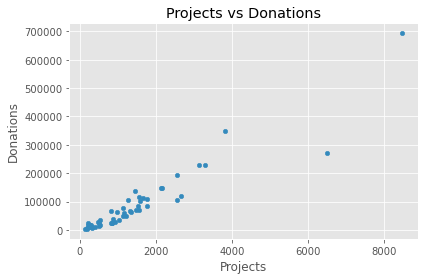

In [76]:
# Now it is time to visualize this data for further insights.
df.plot.scatter(x = "Projects", y = "Donations")
plt.title("Projects vs Donations")
plt.tight_layout()
plt.margins(0.05)

In [77]:
np.corrcoef(df.Projects,df.Donations)   ## It is indeed a pretty strong correlation which is equal to 0.944

array([[1.        , 0.94386847],
       [0.94386847, 1.        ]])

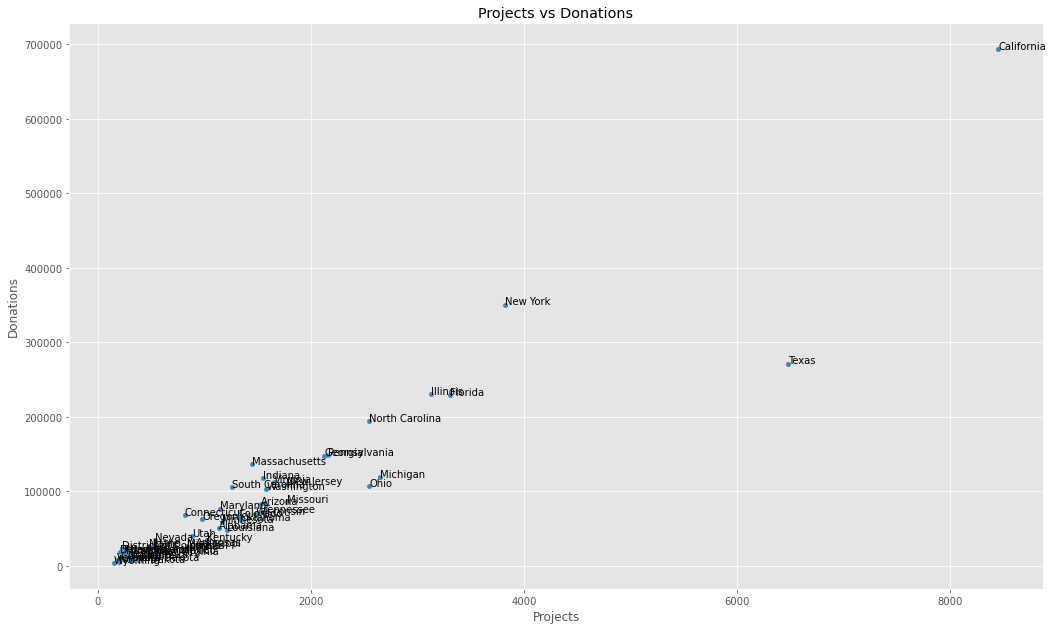

In [78]:
## In this part, I will try to explain how we can add data labels in scatter plot with the help of .annotate() method.
df.plot.scatter(x = "Projects", y = "Donations")
plt.title("Projects vs Donations")
for i, j in enumerate(df.index):
    plt.annotate(j,(df.Projects[i], df.Donations[i]))
plt.tight_layout()
plt.margins(0.05)
## to increase figure size : 
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

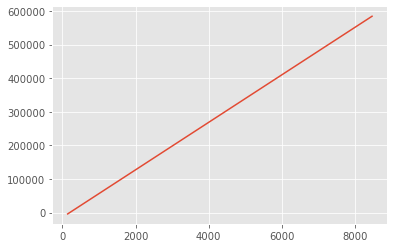

In [79]:
# Now, I would like to fit a linear model which will basically indicate the relationship between projects and donations.
slope, intercept = np.polyfit(df.Projects, df.Donations, 1)
x = np.array([df.Projects.min(), df.Projects.max()])
y =  slope * x + intercept 
plt.plot(x,y)

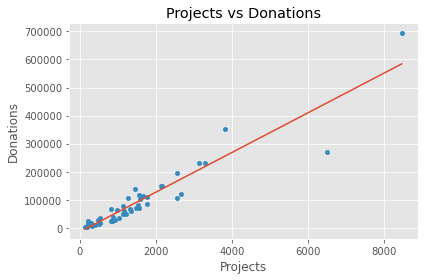

In [80]:
## Now, lets combine two graphs in the same plot: 
_ = df.plot.scatter(x = "Projects", y = "Donations")
_ = plt.title("Projects vs Donations")
slope, intercept = np.polyfit(df.Projects, df.Donations, 1)
x = np.array([df.Projects.min(), df.Projects.max()])
y =  slope * x + intercept 
_ = plt.plot(x,y)
_ = plt.tight_layout()
_ = plt.margins(0.05)

In [81]:
# Lets recall our dataframe to seek for new questions :
data4.head(1)

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,...,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District,Teacher Prefix,Teacher First Project Posted Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,...,Stanford Primary Center,suburban,95.0,California,90280,South Gate,Los Angeles,Los Angeles Unif Sch Dist,Mrs.,2011-12-11


## Q3: How mant different project types exists ?  What is the total donation amount for each of them ? 

In [82]:
s6 = data4["Project Type"].value_counts()

In [83]:
s6

Teacher-Led                 4532463
Professional Development      43217
Student-Led                   32400
Name: Project Type, dtype: int64

In [84]:
s7 = data4.groupby("Project Type")["Donation Amount"].sum().astype(int)

In [85]:
s7

Project Type
Professional Development      2474442
Student-Led                   2711059
Teacher-Led                 276046773
Name: Donation Amount, dtype: int32

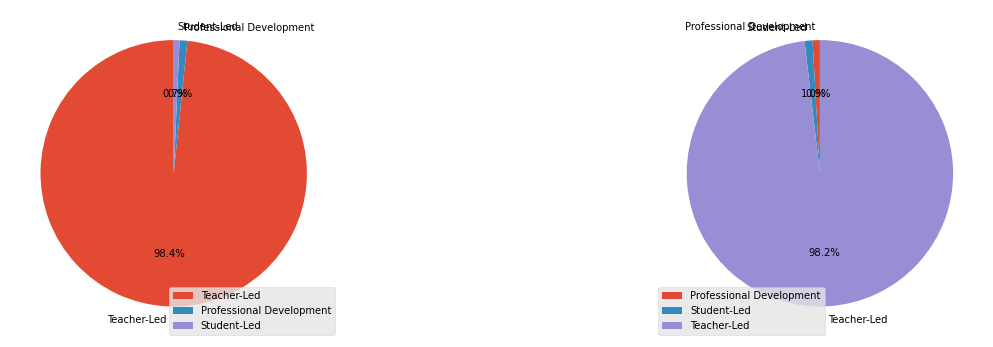

In [93]:
plt.subplot(1,2,1)
plt.pie(s6, autopct = '%1.1f%%',labels = s6.index, startangle = 90)
plt.tight_layout()
plt.margins(0.05)
plt.legend(loc = "lower right")
plt.subplot(1,2,2)
plt.pie(s7, autopct = "%1.1f%%",labels = s7.index, startangle = 90)
plt.legend(loc = "lower left")
plt.tight_layout()
plt.margins(0.05)
fig = plt.gcf()
fig.set_size_inches(15, 5)


## Q4: How mant project subject category trees exists ? Which ones attracted the most donations ? 

In [94]:
data4["Project Subject Category Tree"].nunique()

51

In [95]:
# Which ones attracted the most donations ? 
s8 = data4.groupby("Project Subject Category Tree")["Donation Amount"].sum().sort_values(ascending = False).astype(int).head(15)

In [96]:
s8

Project Subject Category Tree
Literacy & Language                      59463406
Math & Science                           46378412
Literacy & Language, Math & Science      38882421
Music & The Arts                         17654172
Applied Learning                         11536010
Health & Sports                          10830324
Literacy & Language, Special Needs       10037973
Special Needs                             8669187
Applied Learning, Literacy & Language     7691442
Math & Science, Literacy & Language       6820461
History & Civics                          5612012
Literacy & Language, Music & The Arts     5038590
Applied Learning, Special Needs           5036123
History & Civics, Literacy & Language     4886560
Math & Science, Applied Learning          4645578
Name: Donation Amount, dtype: int32

Text(0.5, 1.0, 'Donation Amount by Project Subject')

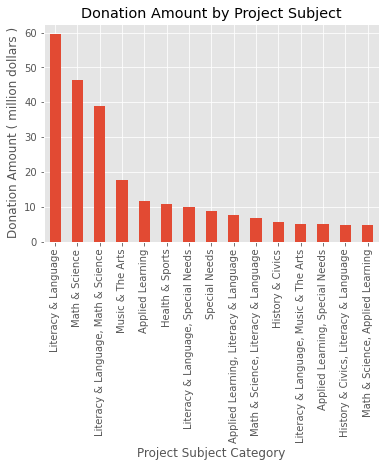

In [97]:
## To convert it to million dollars.
s9 = s8 / 1000000
# lets visualize it : 
s9.plot.bar()
plt.xlabel("Project Subject Category")
plt.ylabel("Donation Amount ( million dollars )")
plt.title("Donation Amount by Project Subject")

## Q5: What is the mean time that takes a project to be fully funded after posted and how it varies between states ?

## Q6: Which states are the best and which are the worst performing in terms of this criteria ( mean project fully funded time) ?

In [98]:
data4[["Project Posted Date", "Project Fully Funded Date"]].isnull().sum()
## to see how many projects are still open, we may choose to remove that ones.

Project Posted Date               0
Project Fully Funded Date    437295
dtype: int64

In [99]:
# to understand their formats. These two columns are initially object types. We will convert them to datetime.
data4[["Project Fully Funded Date", "Project Posted Date"]].head(10)

,Project Fully Funded Date,Project Posted Date
0,2013-01-11,2013-01-01
1,2013-01-11,2013-01-01
2,2013-01-11,2013-01-01
3,2013-02-02,2013-01-08
4,2013-02-02,2013-01-08
5,2013-02-21,2013-02-04
6,2013-02-15,2013-02-11
7,2013-02-21,2013-02-17
8,2013-08-18,2013-08-01
9,2013-10-10,2013-08-12


In [100]:
data4["Project Posted Date"] = pd.to_datetime(data4["Project Posted Date"])
data4["Project Posted Date"].dtype

dtype('<M8[ns]')

In [101]:
data4["Project Fully Funded Date"] = pd.to_datetime(data4["Project Fully Funded Date"].dropna())
data4["Project Fully Funded Date"].dtype

dtype('<M8[ns]')

In [102]:
data4["Funding Time"] = data4["Project Fully Funded Date"] - data4["Project Posted Date"]
data4[["Funding Time","Project Fully Funded Date","Project Posted Date"]].head()

,Funding Time,Project Fully Funded Date,Project Posted Date
0,10 days,2013-01-11,2013-01-01
1,10 days,2013-01-11,2013-01-01
2,10 days,2013-01-11,2013-01-01
3,25 days,2013-02-02,2013-01-08
4,25 days,2013-02-02,2013-01-08


In [103]:
data4[["Funding Time","Project Fully Funded Date","Project Posted Date"]].isnull().sum()

Funding Time                 437295
Project Fully Funded Date    437295
Project Posted Date               0
dtype: int64

In [104]:
data5 = data4[pd.notnull(data4["Funding Time"])]   ## to drop NaT values.
data5[["Funding Time","Project Fully Funded Date","Project Posted Date"]].isnull().sum()

Funding Time                 0
Project Fully Funded Date    0
Project Posted Date          0
dtype: int64

In [105]:
import datetime as dt
data5["Funding Time"] = data5["Funding Time"].dt.days 

C:\Users\shubh\AppData\Local\Temp/ipykernel_16808/1478349760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data5["Funding Time"] = data5["Funding Time"].dt.days


In [106]:
data5[["Funding Time","Project Fully Funded Date","Project Posted Date"]].head()

,Funding Time,Project Fully Funded Date,Project Posted Date
0,10,2013-01-11,2013-01-01
1,10,2013-01-11,2013-01-01
2,10,2013-01-11,2013-01-01
3,25,2013-02-02,2013-01-08
4,25,2013-02-02,2013-01-08


In [107]:
mean_time_project_funding = data5.groupby("Project ID")["Funding Time"].mean()
overall_mean_time = mean_time_project_funding.mean()
overall_mean_time

32.171606457403584

In [108]:
wrong_overall_mean_time = data5["Funding Time"].mean()
wrong_overall_mean_time

35.47807690878336

In [109]:
states_project_funding_time = data5.groupby(["School State", "Project ID"])["Funding Time"].mean()
states_project_funding_time

School State  Project ID                      
Alabama       00002d44003ed46b066607c5455a999a     41.0
              000e336c167aae4394ac037e002aa2b9     58.0
              00105d1128dbbf4e0774804052b5bedb     27.0
              0014d0f8aa7dbbd5705956d7458a0d9f     15.0
              001a70c8fdb47880cbcde5675193b877     18.0
                                                  ...  
Wyoming       fe83942b407a1f868cb48b2bbeab4988     23.0
              febb789ba78badf633114020f1483392      2.0
              ff1d119bac584ec35d3740f83f3daa7d    112.0
              ff43f8665a9ed6a009f395b18d96734a     64.0
              ffbcf2e301bd4b2e80dc9faea5b02a57    110.0
Name: Funding Time, Length: 720847, dtype: float64

In [110]:
states_average_funding_time = states_project_funding_time.groupby("School State").mean()

In [111]:
states_average_funding_time.round(0)   ## to get the exact days I rounded to 0 decimal.

School State
Alabama                 36.0
Alaska                  34.0
Arizona                 35.0
Arkansas                35.0
California              32.0
Colorado                31.0
Connecticut             32.0
Delaware                33.0
District of Columbia    26.0
Florida                 31.0
Georgia                 35.0
Hawaii                  27.0
Idaho                   31.0
Illinois                30.0
Indiana                 32.0
Iowa                    37.0
Kansas                  31.0
Kentucky                33.0
Louisiana               36.0
Maine                   35.0
Maryland                32.0
Massachusetts           32.0
Michigan                32.0
Minnesota               31.0
Mississippi             37.0
Missouri                31.0
Montana                 31.0
Nebraska                36.0
Nevada                  35.0
New Hampshire           31.0
New Jersey              32.0
New Mexico              35.0
New York                33.0
North Carolina          32.0
N

In [112]:
ss = states_average_funding_time.round(0)

In [113]:
ss[ss < 32].sort_values().head(10)


School State
District of Columbia    26.0
Hawaii                  27.0
Wyoming                 29.0
Vermont                 30.0
Illinois                30.0
Oregon                  30.0
Pennsylvania            31.0
Oklahoma                31.0
New Hampshire           31.0
Colorado                31.0
Name: Funding Time, dtype: float64

Text(0.5, 1.0, 'States that fund projects faster than others')

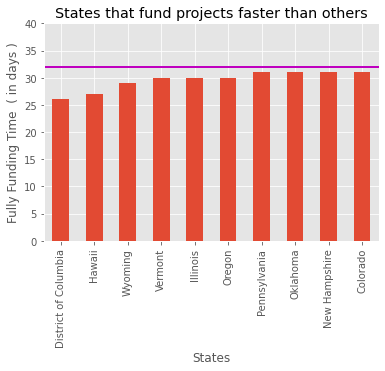

In [114]:
fast_funding_states = ss[ss < 32].sort_values().head(10)
fast_funding_states.plot.bar()
plt.axhline(32, color ="m", linewidth = 2)
plt.ylim(0,40)
plt.xlabel("States")
plt.ylabel("Fully Funding Time  ( in days )")
plt.title("States that fund projects faster than others")

In [115]:
ss[ss > 32].sort_values(ascending = False).head(10)

School State
Iowa             37.0
Mississippi      37.0
Alabama          36.0
Utah             36.0
Louisiana        36.0
Nebraska         36.0
West Virginia    36.0
Georgia          35.0
Maine            35.0
Arkansas         35.0
Name: Funding Time, dtype: float64

Text(0.5, 1.0, 'States that fund projects slower than others')

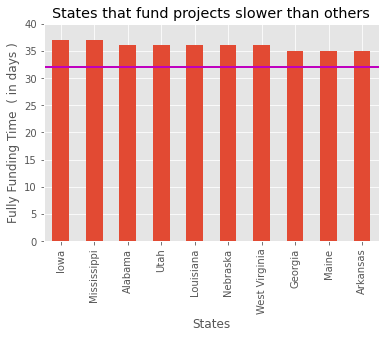

In [116]:
slow_funding_states = ss[ss > 32].sort_values(ascending = False).head(10)
slow_funding_states.plot.bar()
plt.axhline(32, color = "m", linewidth = 2)
plt.ylim(0,40)
plt.xlabel("States")
plt.ylabel("Fully Funding Time  ( in days )")
plt.title("States that fund projects slower than others")